# pa005: High Value Customer Identification (Insiders)

## Solution Plan (IOT)

 ### 0.1. Input

1. Business problem
    - Select the most valuable costumers to join a loyalty program called "Insiders"
    

2. Data
    - Sales during the period of one year

 ### 0.2. Output

1. Refer some people elegible to be part of the loyalty program
            | client_id | is_insider | 
            | 20394     | yes(1)     |
            | 23948     | no (0)     |

 ### 0.3. Tasks

1. who are the people eligible for the loyalty program?
    - What does "being elegible" mean? Who are the "valuable customers"?
        - Invoicing:
            - High ATP
            - High LTV
            - Low recency
            - High basket size
            - Low probability of churn
        - Cost:
            - Low product return rate
        - Shopping Experience:       
            - High average rating
            
        
2. How many customers will be able to join the group?
    - Total number of customers
    - % Insiders Group
3. What are the main features of these customers?
        -  Age
        - Location
4. How much do the Insiders contribute to the total billing amount?
    - Total billing amout
    - % Insiders billing
5. Whet is the Insider's billing forecast for the coming months?
    - LTV Insiders group
    - Cohort analysis
6. What are the conditions to someone be elegible to the Insiders group?
    - The person has to be similar to the others in the group
8. How to ensure that the Insiders program is better tha the current model?
    - A/B test
    - Bayesian A/B test
    - Hypotesis test
9. What are the marketing plans for this group?
    - Discounts
    - Purchase preference
    - Free shipping

# 0.0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import umap.umap_ as umap

from matplotlib import pyplot as plt
from plotly import express as px
from IPython.display import HTML

from sklearn import cluster as c
from sklearn import metrics as m

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )


    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Dataset

In [3]:
# Load data
ecommerce = pd.read_csv('../data/Ecommerce.csv',encoding='latin1')

# Drop extra column
ecommerce = ecommerce.iloc[:,:-1]

# 1.0. Data description

In [4]:
ecommerce1 = ecommerce

## 1.1. Rename Columns

In [5]:
new_cols =  ['invoice_no', 'stock_code','description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
ecommerce1.columns = new_cols

## 1.2. Data Dimensions

In [6]:
ecommerce1.shape

(541909, 8)

## 1.3. Data types

In [7]:
ecommerce1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [8]:
ecommerce1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [9]:
ecommerce1.dropna(subset = ['description','customer_id'], inplace = True)

In [10]:
ecommerce1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change Dtypes

In [11]:
# Invoice date
ecommerce['invoice_date'] = pd.to_datetime(ecommerce1['invoice_date'], format = '%d-%b-%y')

# Customer id
ecommerce['customer_id'] = ecommerce1['customer_id'].astype(int)

## 1.7. Drop Duplicates

In [12]:
ecommerce1 = ecommerce1.drop_duplicates()

## 1.8. Descriptive Statistics

# 2.0. Feature Engineering

In [13]:
ecommerce2 = ecommerce1

## 2.1. Feature Creation

In [14]:
customer_df = ecommerce2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'], axis = 1).drop_duplicates(ignore_index = True)

In [15]:
# Gross Revenue
ecommerce2['gross_revenue'] = ecommerce2['quantity'] * ecommerce2['unit_price']
df_gross_revenue = ecommerce2[['gross_revenue','customer_id']].groupby('customer_id').sum().reset_index()
customer_df = pd.merge(customer_df, df_gross_revenue,on = 'customer_id', how = 'left')

# Recency - Last day purchase
df_recency = ecommerce2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency'] = (ecommerce2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency']].copy()
customer_df = pd.merge(customer_df, df_recency, on = 'customer_id', how = 'left')

# Frequency
df_frequency = ecommerce2[['invoice_no', 'customer_id']].drop_duplicates().groupby('customer_id').count().reset_index()
customer_df = pd.merge(customer_df, df_frequency, on = 'customer_id', how = 'left')

# AVG Ticket
df_avgticket = ecommerce2[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns = {'gross_revenue':'avg_ticket'})
customer_df = pd.merge(customer_df, df_avgticket, on = 'customer_id', how = 'left')

# 3.0. Data Filtering

In [16]:
ecommerce3 = customer_df.copy()

# 4.0. Exploratory Data Analysis

In [17]:
ecommerce4 = ecommerce3.copy()

# 5.0. Data Preparation

In [18]:
ecommerce5 = ecommerce4.copy()

# 6.0. Feature Selection

In [19]:
ecommerce6 = ecommerce5.copy()

# 7.0. Hyperparameter Fine-Tunning

In [20]:
ecommerce7 = ecommerce6.copy()
X = ecommerce7.drop('customer_id', axis = 1).copy()

In [21]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1. Within-Cluster Sum of Square (WSS)

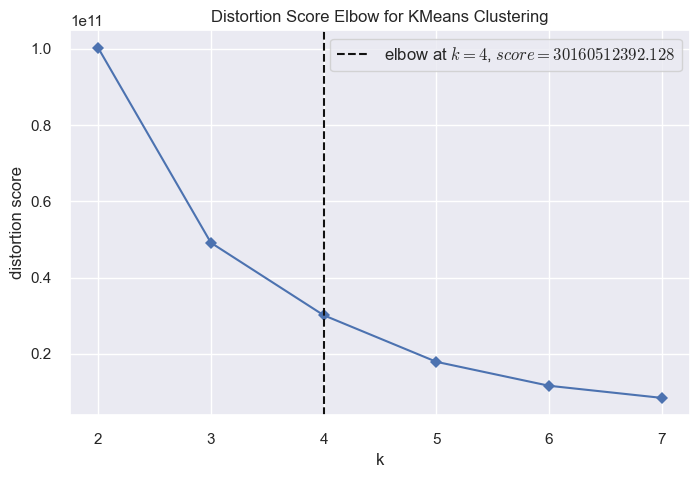

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
kmeans = KElbowVisualizer( c.KMeans(), k = clusters, timings = False)
plt.figure(figsize=(8, 5))
kmeans.fit( X )
kmeans.show()

## 7.2. Sillhouette Score

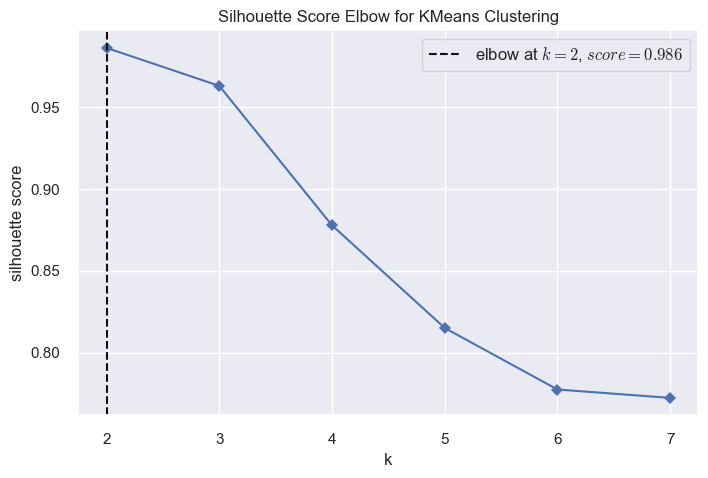

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KElbowVisualizer( c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
plt.figure(figsize=(8, 5))
kmeans.fit( X )
kmeans.show()

### 7.2.1. Silhouette Analysis

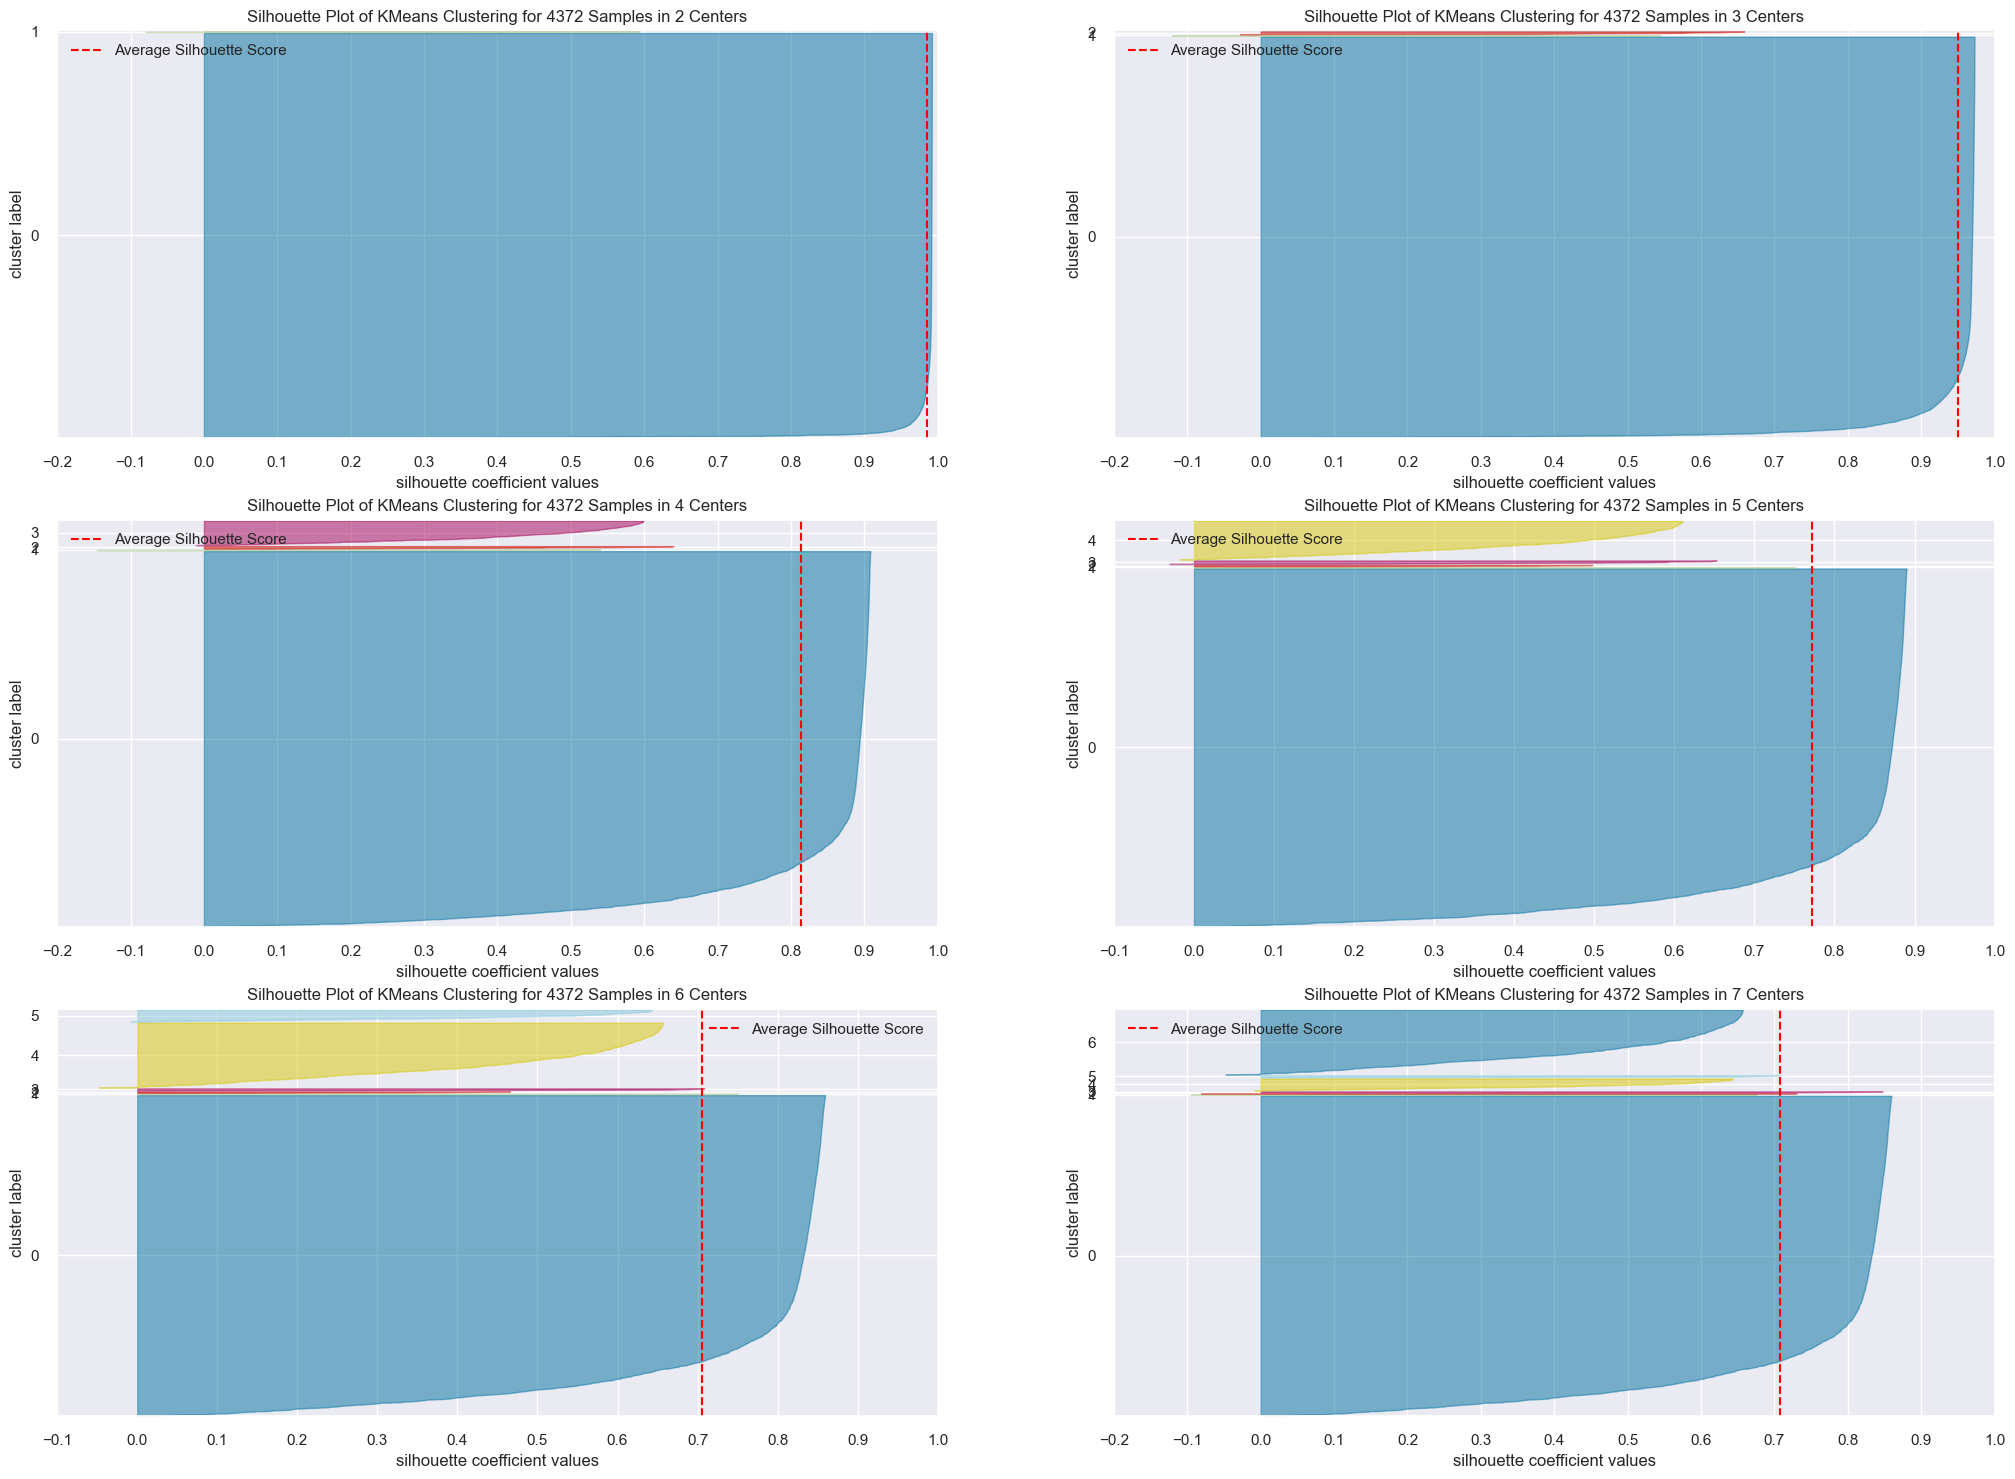

In [24]:
fig, ax = plt.subplots( 3, 2, figsize=(25,18) )
for k in clusters:
    km = c.KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors = 'yellowbrick', ax = ax[q-1][mod] )
    visualizer.fit( X )
    visualizer.finalize()

# 8.0. Model Training

## 8.1. K-Means

In [25]:
# Model definition
k = 4
kmeans = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)
# Model training
kmeans.fit( X )

# Clustering
labels = kmeans.predict( X )## 8.1. K-Means

## 8.2. Cluster Validation

In [26]:
## WSS (Within-cluster sum of square)
print("WSS value: {}".format( kmeans.inertia_))

## SS ( Silhouette Score)
print("SS value: {}".format ( m.silhouette_score(X, labels, metric = 'euclidean' ) ) )

WSS value: 40118883596.905624
SS value: 0.814222141050874


# 9.0. Cluster Analysis

In [27]:
ecommerce9 = ecommerce6.copy()
ecommerce9['cluster'] = labels

## 9.1. Visual Inspection

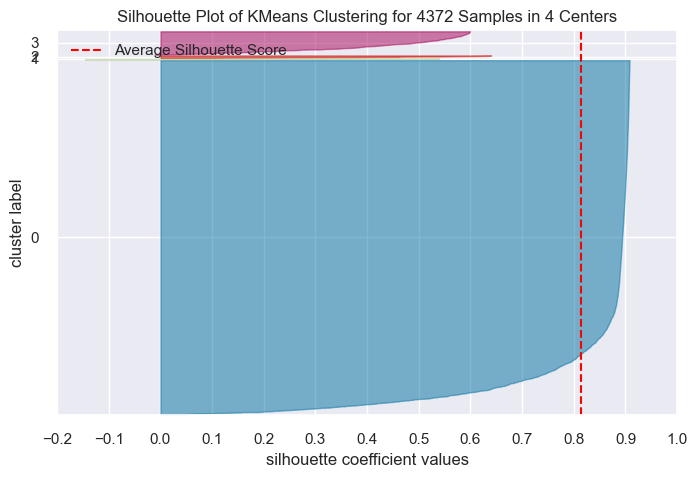

In [31]:
plt.figure(figsize=(8, 5))
visualizer = SilhouetteVisualizer (kmeans, colors = 'yellowbrick')
visualizer.fit( X )
visualizer.finalize()

## 9.2. 2d plot

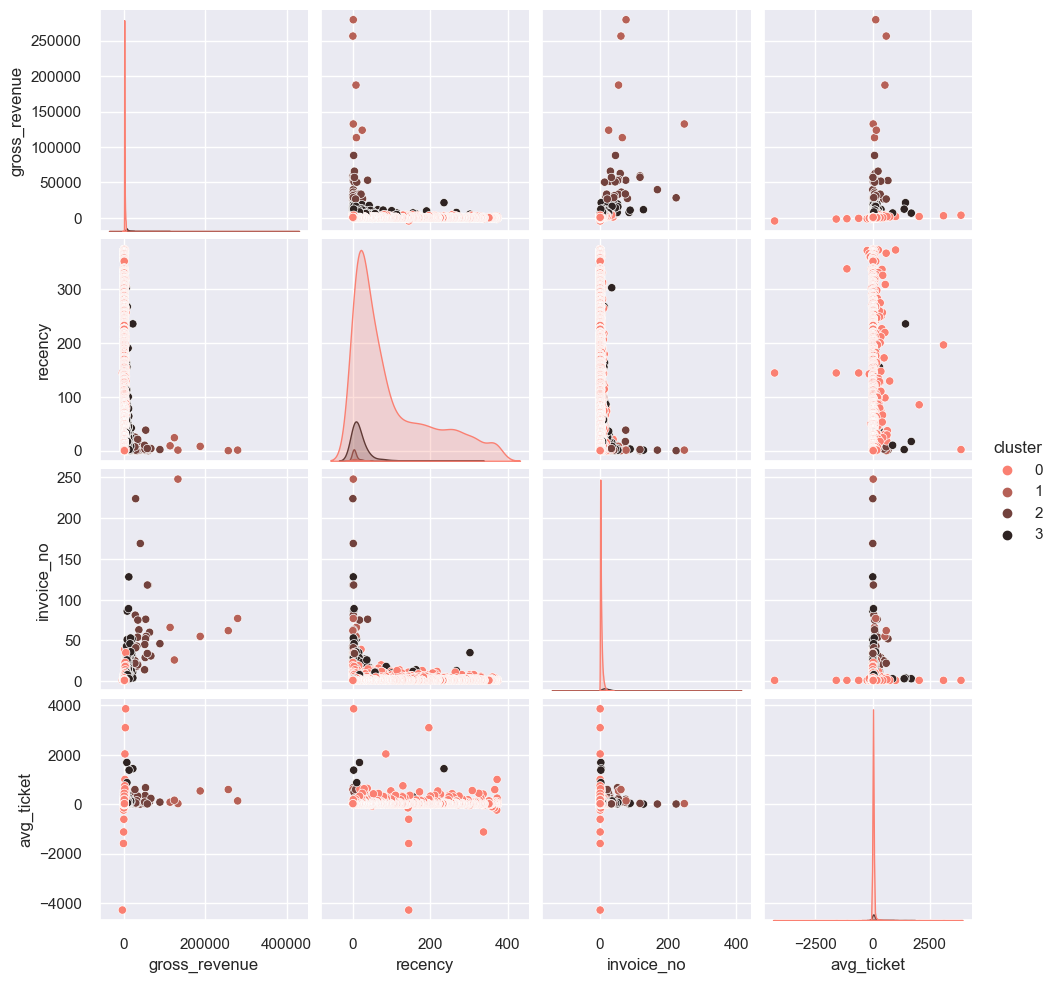

In [29]:
df_viz = ecommerce9.drop(columns = 'customer_id', axis = 1)
sns.pairplot(df_viz, hue = 'cluster', palette = "dark:salmon_r")

## 9.3. UMAP

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

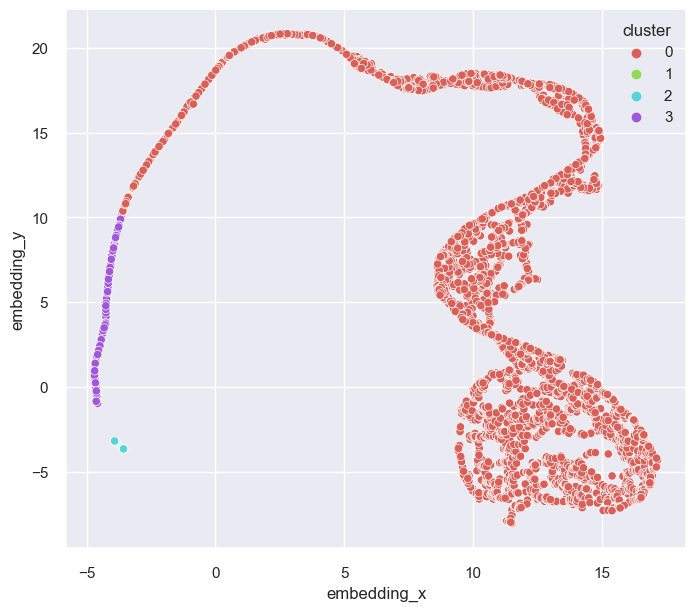

In [46]:
reducer = umap.UMAP( n_neighbors = 20, random_state = 42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[: , 0]
df_viz['embedding_y'] = embedding[: , 1]

# Plot UMAP
plt.figure(figsize=(8, 7))
sns.scatterplot( x = 'embedding_x', y = 'embedding_y',
                 hue = 'cluster',
                 palette = sns.color_palette('hls', n_colors = len( df_viz['cluster'].unique() ) ), 
                 data = df_viz )

In [ ]:
#fig = px.scatter_3d(ecommerce9, x='recency',y='invoice_no', z= 'gross_revenue', color = 'cluster' )
#fig.show()

## 9.2. Cluster Profile

In [77]:
# Number of customers
no_customers = ecommerce9[['customer_id','cluster']].groupby('cluster').count().reset_index()
no_customers['percentage'] = ( no_customers['customer_id'] /  no_customers['customer_id'].sum() ) * 100

# AVG Gross Revenue
class_gross_revenue = ecommerce9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index().rename(columns = {'gross_revenue':'avg_gross_revenue'})
df_cluster = pd.merge(no_customers, class_gross_revenue, how = 'inner', on = 'cluster')

# AVG Recency days
class_recency = ecommerce9[['recency','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, class_recency, how = 'inner', on = 'cluster')

# AVG invoices
class_invoices = ecommerce9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, class_invoices, how = 'inner', on = 'cluster')

# AVG ticket
class_avgticket = ecommerce9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, class_avgticket, how = 'inner', on = 'cluster')

# Percentual Gross Revenue
perc_gross_revenue = ecommerce9[['gross_revenue','cluster']].groupby('cluster').sum().reset_index()
perc_gross_revenue['percentual_gross_revenue'] = ( perc_gross_revenue['gross_revenue'] /  perc_gross_revenue['gross_revenue'].sum() ) * 100
df_cluster = pd.merge(df_cluster, perc_gross_revenue, how = 'inner', on = 'cluster')

In [78]:
df_cluster

,cluster,customer_id,percentage,avg_gross_revenue,recency,invoice_no,avg_ticket,gross_revenue,percentual_gross_revenue
0,0,4071,93.115279,942.372693,96.969295,3.641120,25.387271,3836399.234,46.341632
1,1,6,0.137237,182108.075000,7.166667,89.000000,253.831514,1092648.450,13.198604
2,2,28,0.640439,42645.737143,6.178571,57.821429,163.273933,1194080.640,14.423850
3,3,267,6.107045,8072.611236,20.280899,19.528090,62.795372,2155387.200,26.035914


### Cluster 01: (Insider Candidades)
    - Customers: 6 (0.14% of the customers)
    - AVG Recency: 7 days
    - AVG invoices: 89
    - AVG Revenue: $ 182.108.000
    
### Cluster 02:
    - Customers: 31 (0.71% of the customers)
    - AVG Recency: 14 days
    - AVG invoices: 53
    - AVG Revenue: $ 40.543,52
    
### Cluster 03: 
    - Customers: 4335 (99% of the customers)
    - AVG Recency: 92 days
    - AVG invoices: 5
    - AVG Revenue: $ 1.372,57

# 10.0. Deploy to Production